## William Taylor
## 12.07.2020
## Economist: Corruption and Development Exercise

This exercise is from the "Data Science and Machine Learning Bootcamp with R" course from Udemy: https://www.udemy.com/course/data-science-and-machine-learning-bootcamp-with-r/

The purpose of this assignment is to reinforce data visualization concepts learned through in POLI 281 at UNC as well as through this Udemy course.

This is the visualization that we will be recreating: https://www.economist.com/graphic-detail/2011/12/02/corrosive-corruption
<img src="Economist1.png">

In [1]:
# import ggplot2 and data.table
library(ggplot2)
library(ggthemes)
library(data.table)

In [2]:
# import data and assign to dataframe
df = read.csv("Economist_Assignment_Data.csv")
head(df)

,X,Country,HDI.Rank,HDI,CPI,Region
,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,1,Afghanistan,172,0.398,1.5,Asia Pacific
2,2,Albania,70,0.739,3.1,East EU Cemt Asia
3,3,Algeria,96,0.698,2.9,MENA
4,4,Angola,148,0.486,2.0,SSA
5,5,Argentina,45,0.797,3.0,Americas
6,6,Armenia,86,0.716,2.6,East EU Cemt Asia


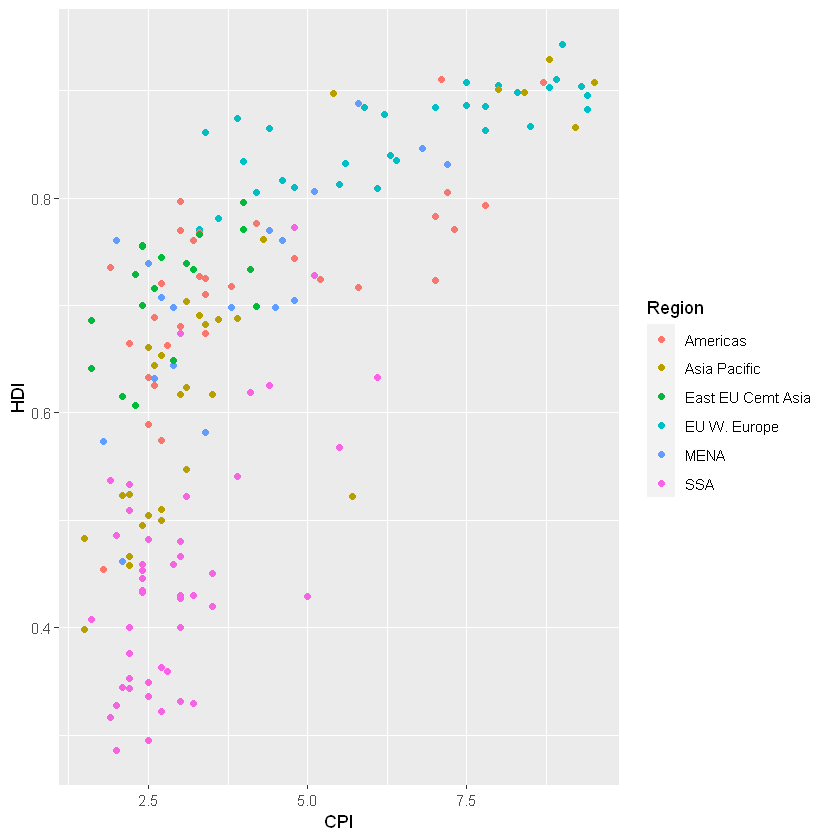

In [3]:
# first, create a scatter plot comparing Corruption Percecptions Index (CPI) and Human Development Index (HDI),
# differentiating by region
ggplot(df, aes(x = CPI, y = HDI, color = Region)) + 
    geom_point()

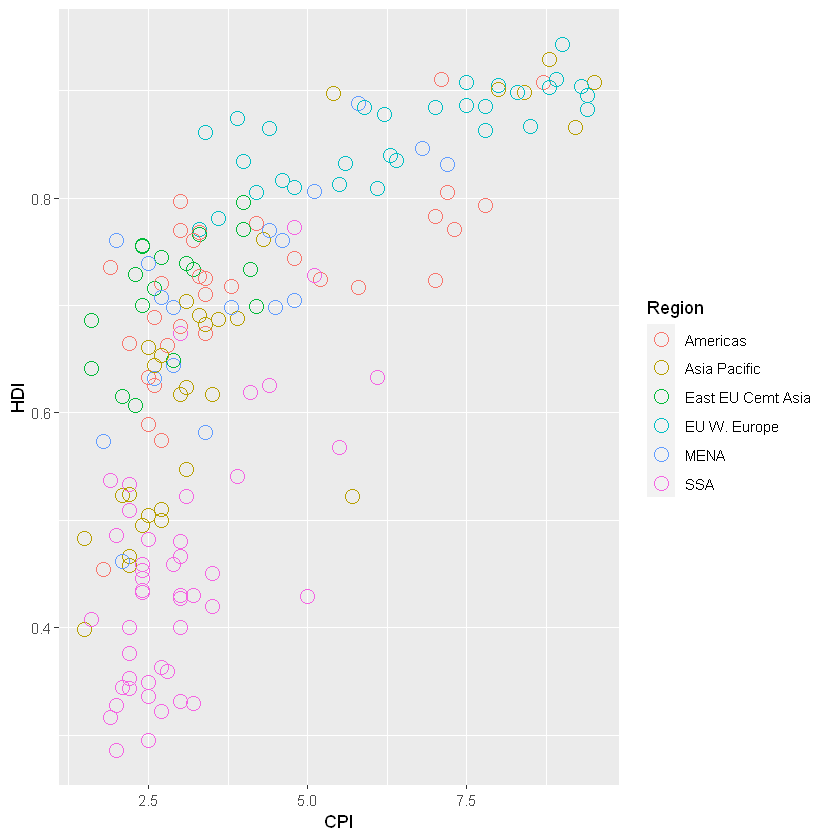

In [4]:
# change shape and size of circles
ggplot(df, aes(x = CPI, y = HDI, color = Region)) +
    geom_point(shape = 1, size = 4)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



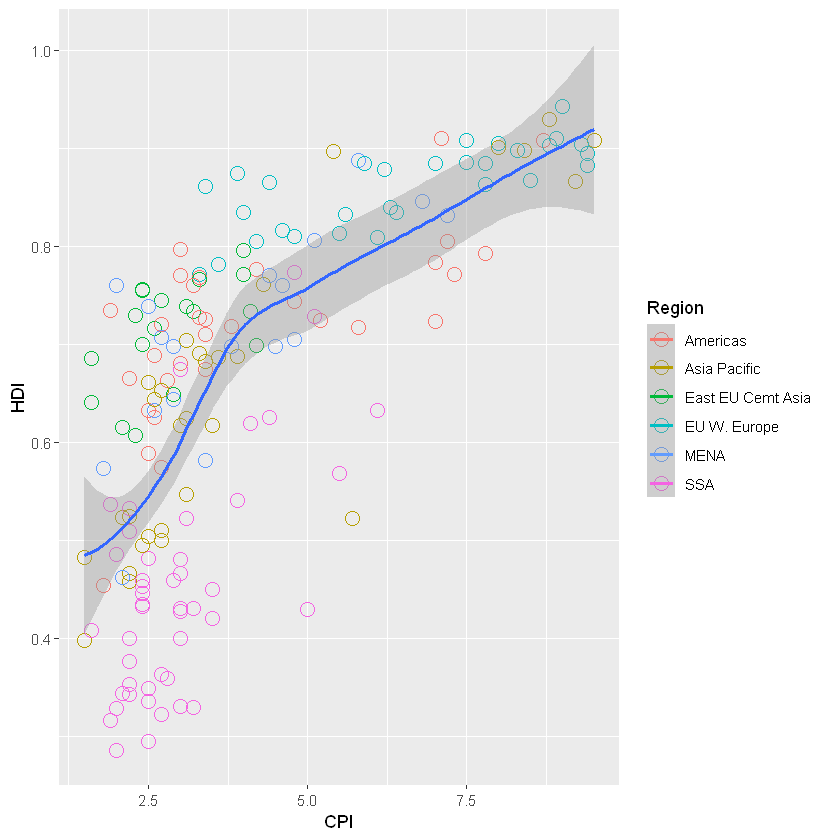

In [5]:
# add trendline
ggplot(df, aes(x = CPI, y = HDI, color = Region)) +
    geom_point(shape = 1, size = 4) + geom_smooth(aes(group = 1))

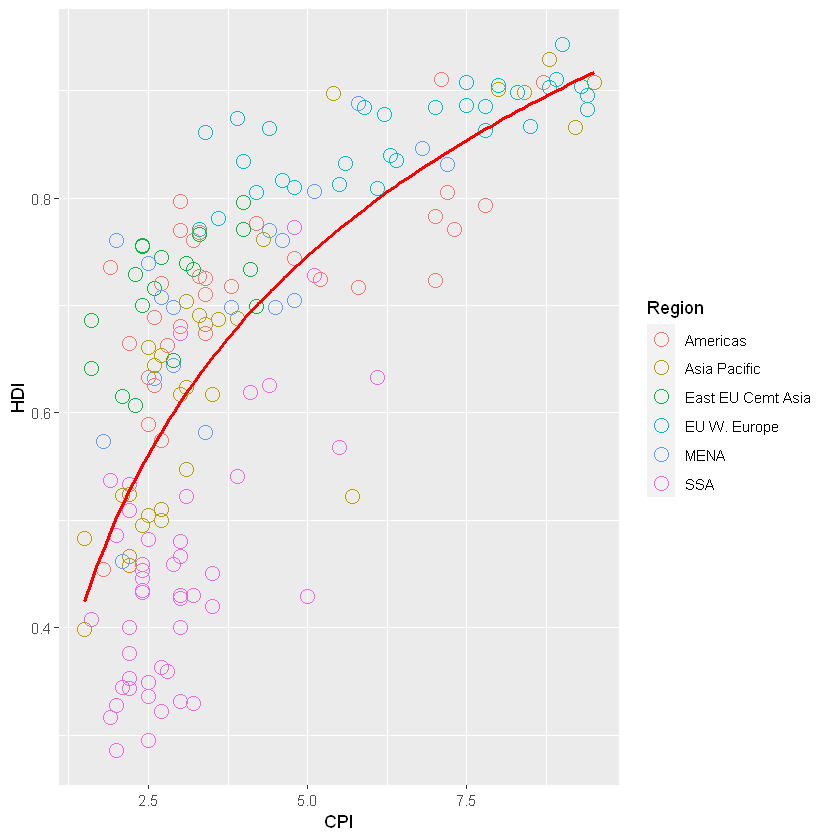

In [6]:
# change trendline's method, formula, color, and remove confidence interval
ggplot(df, aes(x = CPI, y = HDI, color = Region)) +
    geom_point(shape = 1, size = 4) +
    geom_smooth(aes(group = 1), method = "lm", formula = y ~ log(x), se = F, color = "red")

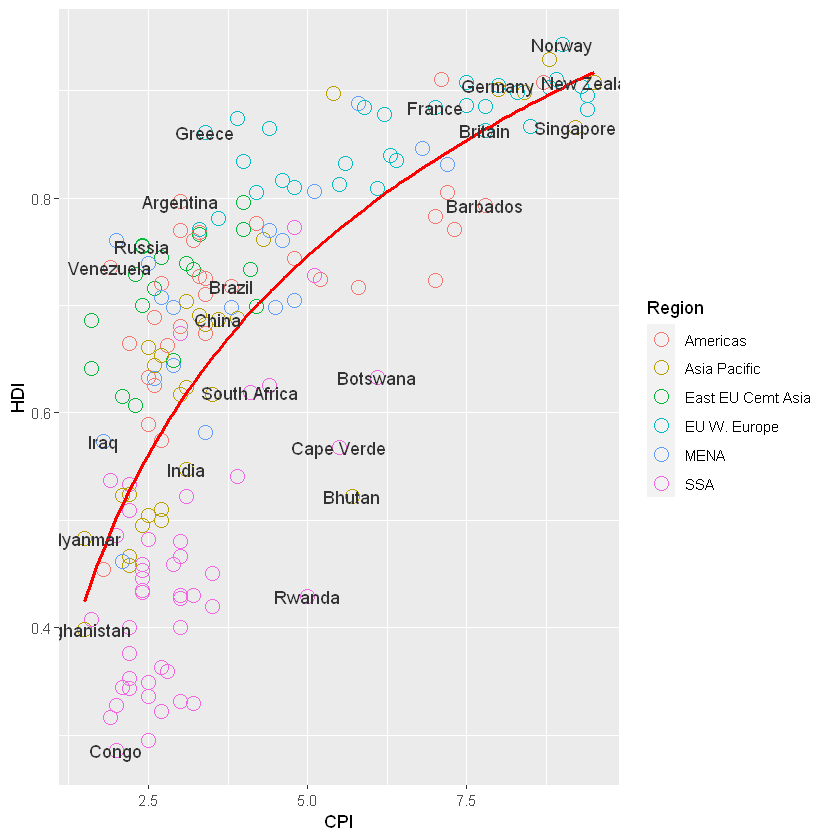

In [7]:
# label subset of countries as directed by exercise instructions
countries = c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spain",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

# note: %in% places one label per country
ggplot(df, aes(x = CPI, y = HDI, color = Region)) +
    geom_point(shape = 1, size = 4) +
    geom_smooth(aes(group = 1), method = "lm", formula = y ~ log(x), se = F, color = "red") +
    geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% countries), check_overlap = T)

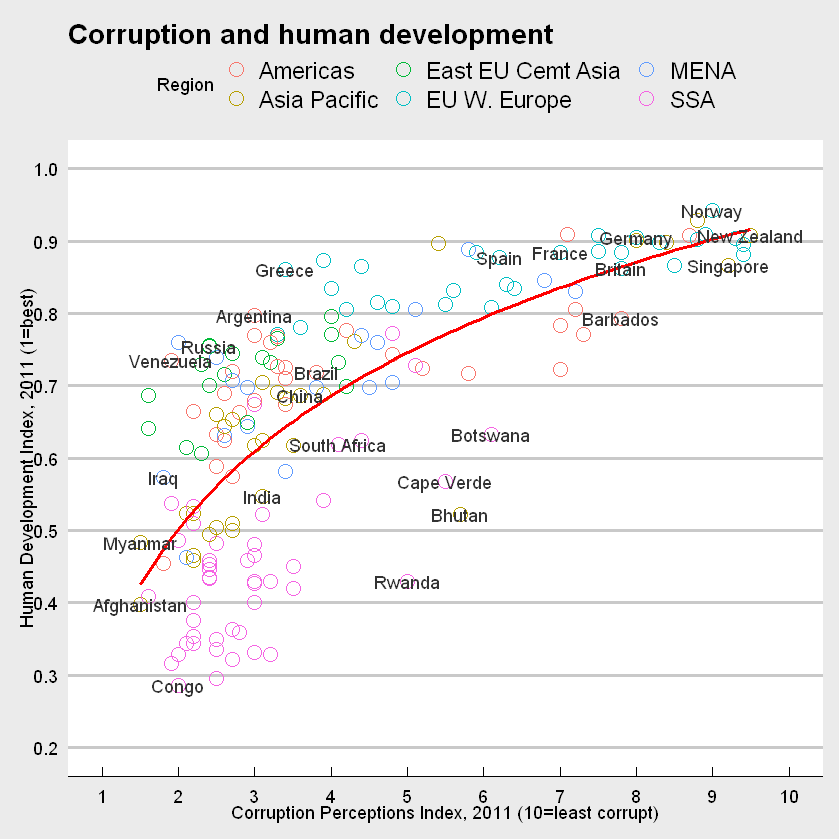

In [8]:
# set theme, x and y scales, labels, and add title, 
ggplot(df, aes(x = CPI, y = HDI, color = Region)) +
    geom_point(shape = 1, size = 4) +
    geom_smooth(aes(group = 1), method = "lm", formula = y ~ log(x), se = F, color = "red") +
    geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% countries), check_overlap = T) +
    scale_x_continuous(limits = c(1, 10), breaks = seq(from = 1, to = 10, by = 1)) + 
    scale_y_continuous(limits = c(.2, 1.0), breaks = seq(from = .2, to = 1.0, by = .1)) +
    labs(title = "Corruption and human development", x = "Corruption Perceptions Index, 2011 (10=least corrupt)", y = "Human Development Index, 2011 (1=best)") +
    theme_economist_white()